Fraud Detection - Handling Class Imbalance

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import pickle
import warnings
warnings.filterwarnings('ignore')

print("="*60)
print("HANDLING CLASS IMBALANCE FOR FRAUD DETECTION")
print("="*60)

HANDLING CLASS IMBALANCE FOR FRAUD DETECTION


LOAD PREPROCESSED DATA

In [3]:
print("\n📂 Loading preprocessed training data...")

X_train = pd.read_csv('../data/X_train.csv')
y_train = pd.read_csv('../data/y_train.csv').values.ravel()

print(f"✅ Training data loaded successfully!")
print(f"   X_train shape: {X_train.shape}")
print(f"   y_train shape: {y_train.shape}")



📂 Loading preprocessed training data...
✅ Training data loaded successfully!
   X_train shape: (198608, 30)
   y_train shape: (198608,)


ANALYZE ORIGINAL CLASS DISTRIBUTION

In [4]:
print("\n" + "="*60)
print("ORIGINAL CLASS DISTRIBUTION ANALYSIS")
print("="*60)

original_class_dist = Counter(y_train)
print(f"\n📊 Original Training Set Distribution:")
print(f"   Legitimate (0): {original_class_dist[0]:,} ({original_class_dist[0]/len(y_train)*100:.2f}%)")
print(f"   Fraud (1): {original_class_dist[1]:,} ({original_class_dist[1]/len(y_train)*100:.2f}%)")
print(f"   Imbalance Ratio: 1:{original_class_dist[0]/original_class_dist[1]:.2f}")



ORIGINAL CLASS DISTRIBUTION ANALYSIS

📊 Original Training Set Distribution:
   Legitimate (0): 198,277 (99.83%)
   Fraud (1): 331 (0.17%)
   Imbalance Ratio: 1:599.02


STRATEGY 1: SMOTE (SYNTHETIC MINORITY OVERSAMPLING)

In [5]:
print("\n" + "="*60)
print("STRATEGY 1: SMOTE (OVERSAMPLING)")
print("="*60)

print("\n🔄 Applying SMOTE to create synthetic fraud samples...")

# Initialize SMOTE
smote = SMOTE(random_state=42, sampling_strategy='minority')

# Apply SMOTE
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

smote_class_dist = Counter(y_train_smote)
print(f"\n✅ SMOTE Applied Successfully!")
print(f"   New dataset size: {len(X_train_smote):,} samples")
print(f"   Legitimate (0): {smote_class_dist[0]:,} ({smote_class_dist[0]/len(y_train_smote)*100:.2f}%)")
print(f"   Fraud (1): {smote_class_dist[1]:,} ({smote_class_dist[1]/len(y_train_smote)*100:.2f}%)")
print(f"   New Imbalance Ratio: 1:{smote_class_dist[0]/smote_class_dist[1]:.2f}")
print(f"   Synthetic samples created: {smote_class_dist[1] - original_class_dist[1]:,}")


STRATEGY 1: SMOTE (OVERSAMPLING)

🔄 Applying SMOTE to create synthetic fraud samples...

✅ SMOTE Applied Successfully!
   New dataset size: 396,554 samples
   Legitimate (0): 198,277 (50.00%)
   Fraud (1): 198,277 (50.00%)
   New Imbalance Ratio: 1:1.00
   Synthetic samples created: 197,946


STRATEGY 2: RANDOM UNDERSAMPLING

In [6]:
print("\n" + "="*60)
print("STRATEGY 2: RANDOM UNDERSAMPLING")
print("="*60)

print("\n🔄 Applying Random Undersampling to reduce majority class...")

# Initialize Random Undersampler
rus = RandomUnderSampler(random_state=42, sampling_strategy='majority')

# Apply Random Undersampling
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

rus_class_dist = Counter(y_train_rus)
print(f"\n✅ Random Undersampling Applied Successfully!")
print(f"   New dataset size: {len(X_train_rus):,} samples")
print(f"   Legitimate (0): {rus_class_dist[0]:,} ({rus_class_dist[0]/len(y_train_rus)*100:.2f}%)")
print(f"   Fraud (1): {rus_class_dist[1]:,} ({rus_class_dist[1]/len(y_train_rus)*100:.2f}%)")
print(f"   New Imbalance Ratio: 1:{rus_class_dist[0]/rus_class_dist[1]:.2f}")
print(f"   Samples removed: {original_class_dist[0] - rus_class_dist[0]:,}")


STRATEGY 2: RANDOM UNDERSAMPLING

🔄 Applying Random Undersampling to reduce majority class...

✅ Random Undersampling Applied Successfully!
   New dataset size: 662 samples
   Legitimate (0): 331 (50.00%)
   Fraud (1): 331 (50.00%)
   New Imbalance Ratio: 1:1.00
   Samples removed: 197,946


STRATEGY 3: COMBINED (SMOTE + UNDERSAMPLING)

In [7]:
print("\n" + "="*60)
print("STRATEGY 3: COMBINED APPROACH (SMOTE + UNDERSAMPLING)")
print("="*60)

print("\n🔄 Applying combined approach...")

# First apply SMOTE with lower ratio
smote_combined = SMOTE(random_state=42, sampling_strategy=0.5)
X_temp, y_temp = smote_combined.fit_resample(X_train, y_train)

# Then apply undersampling
rus_combined = RandomUnderSampler(random_state=42, sampling_strategy=0.8)
X_train_combined, y_train_combined = rus_combined.fit_resample(X_temp, y_temp)

combined_class_dist = Counter(y_train_combined)
print(f"\n✅ Combined Approach Applied Successfully!")
print(f"   New dataset size: {len(X_train_combined):,} samples")
print(f"   Legitimate (0): {combined_class_dist[0]:,} ({combined_class_dist[0]/len(y_train_combined)*100:.2f}%)")
print(f"   Fraud (1): {combined_class_dist[1]:,} ({combined_class_dist[1]/len(y_train_combined)*100:.2f}%)")
print(f"   New Imbalance Ratio: 1:{combined_class_dist[0]/combined_class_dist[1]:.2f}")


STRATEGY 3: COMBINED APPROACH (SMOTE + UNDERSAMPLING)

🔄 Applying combined approach...

✅ Combined Approach Applied Successfully!
   New dataset size: 223,060 samples
   Legitimate (0): 123,922 (55.56%)
   Fraud (1): 99,138 (44.44%)
   New Imbalance Ratio: 1:1.25


VISUALIZE ALL STRATEGIES


VISUALIZING SAMPLING STRATEGIES

✅ Saved: reports/sampling_strategies_comparison.png


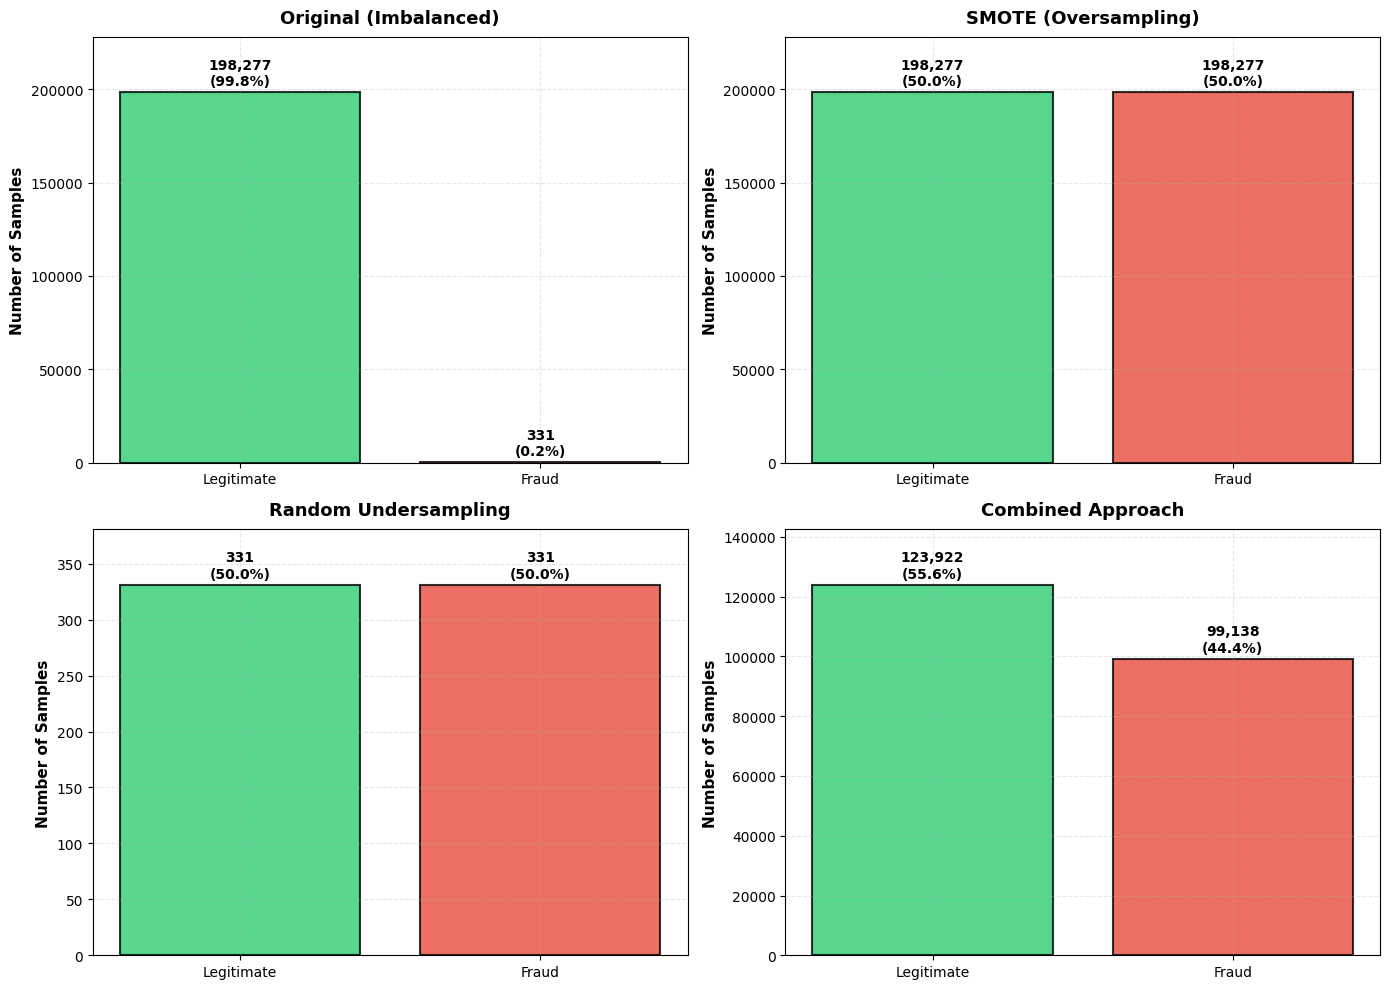

In [8]:
print("\n" + "="*60)
print("VISUALIZING SAMPLING STRATEGIES")
print("="*60)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

strategies = [
    (y_train, 'Original (Imbalanced)', original_class_dist),
    (y_train_smote, 'SMOTE (Oversampling)', smote_class_dist),
    (y_train_rus, 'Random Undersampling', rus_class_dist),
    (y_train_combined, 'Combined Approach', combined_class_dist)
]

for idx, (y_data, title, class_dist) in enumerate(strategies):
    row = idx // 2
    col = idx % 2
    
    axes[row, col].bar(['Legitimate', 'Fraud'], 
                       [class_dist[0], class_dist[1]], 
                       color=['#2ecc71', '#e74c3c'], 
                       alpha=0.8, 
                       edgecolor='black',
                       linewidth=1.5)
    
    axes[row, col].set_ylabel('Number of Samples', fontweight='bold', fontsize=11)
    axes[row, col].set_title(title, fontsize=13, fontweight='bold', pad=10)
    axes[row, col].grid(True, alpha=0.3, linestyle='--')
    
    # Add value labels on bars
    for i, v in enumerate([class_dist[0], class_dist[1]]):
        axes[row, col].text(i, v + max(class_dist.values())*0.02, 
                           f'{v:,}\n({v/sum(class_dist.values())*100:.1f}%)', 
                           ha='center', fontweight='bold', fontsize=10)
    
    # Set y-axis limit for better visualization
    axes[row, col].set_ylim([0, max(class_dist.values()) * 1.15])

plt.tight_layout()
plt.savefig('../reports/sampling_strategies_comparison.png', dpi=300, bbox_inches='tight')
print("\n✅ Saved: reports/sampling_strategies_comparison.png")
plt.show()

CREATE PIE CHART COMPARISON

✅ Saved: reports/sampling_strategies_pie_chart.png


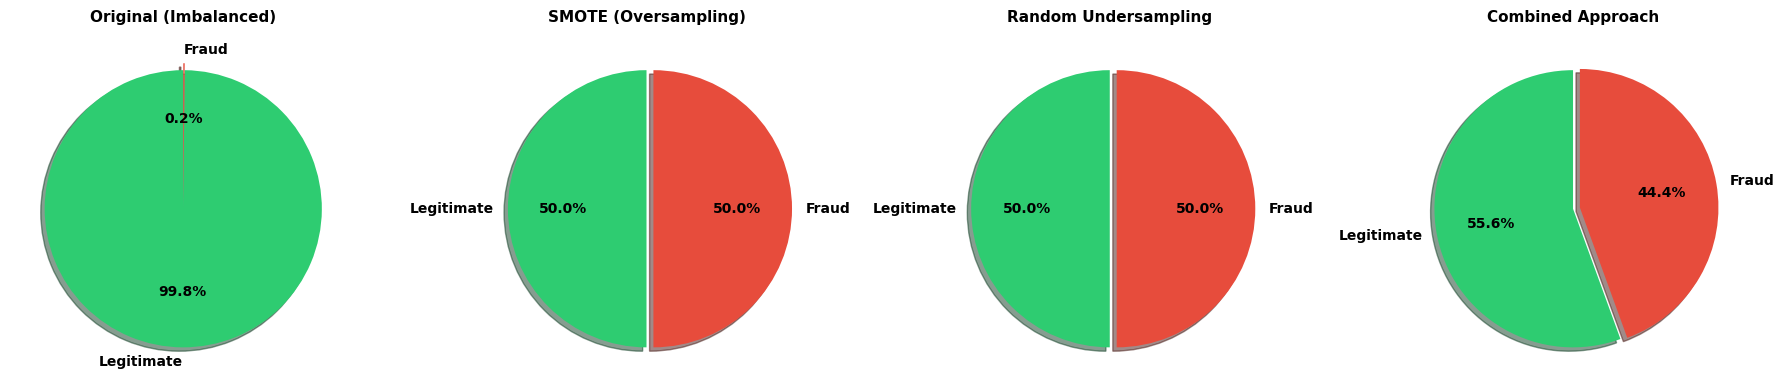

In [9]:
fig, axes = plt.subplots(1, 4, figsize=(18, 4))

for idx, (y_data, title, class_dist) in enumerate(strategies):
    colors = ['#2ecc71', '#e74c3c']
    explode = (0, 0.05)
    
    axes[idx].pie([class_dist[0], class_dist[1]], 
                  labels=['Legitimate', 'Fraud'],
                  autopct='%1.1f%%',
                  colors=colors,
                  explode=explode,
                  startangle=90,
                  shadow=True,
                  textprops={'fontweight': 'bold'})
    axes[idx].set_title(title, fontsize=11, fontweight='bold', pad=10)

plt.tight_layout()
plt.savefig('../reports/sampling_strategies_pie_chart.png', dpi=300, bbox_inches='tight')
print("✅ Saved: reports/sampling_strategies_pie_chart.png")
plt.show()

COMPARISON TABLE

In [10]:
print("\n" + "="*60)
print("SAMPLING STRATEGIES COMPARISON TABLE")
print("="*60)

comparison_data = {
    'Strategy': ['Original', 'SMOTE', 'Undersampling', 'Combined'],
    'Total Samples': [
        len(y_train),
        len(y_train_smote),
        len(y_train_rus),
        len(y_train_combined)
    ],
    'Legitimate': [
        original_class_dist[0],
        smote_class_dist[0],
        rus_class_dist[0],
        combined_class_dist[0]
    ],
    'Fraud': [
        original_class_dist[1],
        smote_class_dist[1],
        rus_class_dist[1],
        combined_class_dist[1]
    ],
    'Fraud %': [
        f"{original_class_dist[1]/len(y_train)*100:.2f}%",
        f"{smote_class_dist[1]/len(y_train_smote)*100:.2f}%",
        f"{rus_class_dist[1]/len(y_train_rus)*100:.2f}%",
        f"{combined_class_dist[1]/len(y_train_combined)*100:.2f}%"
    ],
    'Imbalance Ratio': [
        f"1:{original_class_dist[0]/original_class_dist[1]:.2f}",
        f"1:{smote_class_dist[0]/smote_class_dist[1]:.2f}",
        f"1:{rus_class_dist[0]/rus_class_dist[1]:.2f}",
        f"1:{combined_class_dist[0]/combined_class_dist[1]:.2f}"
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print("\n")
print(comparison_df.to_string(index=False))

# Save comparison table
comparison_df.to_csv('../reports/sampling_comparison_table.csv', index=False)
print("\n✅ Saved: reports/sampling_comparison_table.csv")



SAMPLING STRATEGIES COMPARISON TABLE


     Strategy  Total Samples  Legitimate  Fraud Fraud % Imbalance Ratio
     Original         198608      198277    331   0.17%        1:599.02
        SMOTE         396554      198277 198277  50.00%          1:1.00
Undersampling            662         331    331  50.00%          1:1.00
     Combined         223060      123922  99138  44.44%          1:1.25

✅ Saved: reports/sampling_comparison_table.csv


SAVE BALANCED DATASETS

In [11]:
print("\n" + "="*60)
print("SAVING BALANCED DATASETS")
print("="*60)

# Save SMOTE datasets
pd.DataFrame(X_train_smote).to_csv('../data/X_train_smote.csv', index=False)
pd.DataFrame(y_train_smote).to_csv('../data/y_train_smote.csv', index=False)
print("✅ Saved SMOTE datasets: data/X_train_smote.csv, data/y_train_smote.csv")

# Save Undersampling datasets
pd.DataFrame(X_train_rus).to_csv('../data/X_train_rus.csv', index=False)
pd.DataFrame(y_train_rus).to_csv('../data/y_train_rus.csv', index=False)
print("✅ Saved Undersampling datasets: data/X_train_rus.csv, data/y_train_rus.csv")

# Save Combined approach datasets
pd.DataFrame(X_train_combined).to_csv('../data/X_train_combined.csv', index=False)
pd.DataFrame(y_train_combined).to_csv('../data/y_train_combined.csv', index=False)
print("✅ Saved Combined datasets: data/X_train_combined.csv, data/y_train_combined.csv")

# Save sampling objects for future use
with open('../models/smote_sampler.pkl', 'wb') as f:
    pickle.dump(smote, f)
with open('../models/rus_sampler.pkl', 'wb') as f:
    pickle.dump(rus, f)
print("✅ Saved samplers: models/smote_sampler.pkl, models/rus_sampler.pkl")



SAVING BALANCED DATASETS
✅ Saved SMOTE datasets: data/X_train_smote.csv, data/y_train_smote.csv
✅ Saved Undersampling datasets: data/X_train_rus.csv, data/y_train_rus.csv
✅ Saved Combined datasets: data/X_train_combined.csv, data/y_train_combined.csv
✅ Saved samplers: models/smote_sampler.pkl, models/rus_sampler.pkl


RECOMMENDATIONS

In [12]:
print("\n" + "="*60)
print("RECOMMENDATIONS FOR MODEL TRAINING")
print("="*60)

print("""
📌 Based on the class distribution analysis:

1️⃣ **SMOTE (Recommended for initial training)**
   ✓ Creates synthetic samples for minority class
   ✓ Maintains all original fraud cases
   ✓ Best for learning fraud patterns
   ✓ May lead to overfitting if not careful
   ➤ USE THIS for training all models first

2️⃣ **Random Undersampling**
   ✓ Reduces majority class samples
   ✓ Faster training (smaller dataset)
   ✓ May lose important legitimate transaction patterns
   ✓ Good for quick experiments
   ➤ USE THIS if training time is too long

3️⃣ **Combined Approach (Balanced)**
   ✓ Balances both oversampling and undersampling
   ✓ Moderate dataset size
   ✓ Reduces risk of overfitting
   ✓ Good compromise between the two
   ➤ USE THIS for final model optimization

4️⃣ **Original (With class_weight parameter)**
   ✓ No data manipulation
   ✓ Models handle imbalance internally
   ✓ Faster than resampling
   ✓ Supported by most sklearn models
   ➤ USE THIS as a baseline comparison

💡 **Best Practice:** 
   - Train models on SMOTE data first
   - Compare with class_weight approach
   - Fine-tune with combined approach
   - Validate on original imbalanced validation set
""")


RECOMMENDATIONS FOR MODEL TRAINING

📌 Based on the class distribution analysis:

1️⃣ **SMOTE (Recommended for initial training)**
   ✓ Creates synthetic samples for minority class
   ✓ Maintains all original fraud cases
   ✓ Best for learning fraud patterns
   ✓ May lead to overfitting if not careful
   ➤ USE THIS for training all models first

2️⃣ **Random Undersampling**
   ✓ Reduces majority class samples
   ✓ Faster training (smaller dataset)
   ✓ May lose important legitimate transaction patterns
   ✓ Good for quick experiments
   ➤ USE THIS if training time is too long

3️⃣ **Combined Approach (Balanced)**
   ✓ Balances both oversampling and undersampling
   ✓ Moderate dataset size
   ✓ Reduces risk of overfitting
   ✓ Good compromise between the two
   ➤ USE THIS for final model optimization

4️⃣ **Original (With class_weight parameter)**
   ✓ No data manipulation
   ✓ Models handle imbalance internally
   ✓ Faster than resampling
   ✓ Supported by most sklearn models
   ➤ USE 

FINAL SUMMARY

In [13]:
print("\n" + "="*60)
print("CLASS IMBALANCE HANDLING COMPLETE!")
print("="*60)

print(f"""
✅ All sampling strategies applied successfully!

📊 Datasets Created:
   ✓ Original: {len(y_train):,} samples
   ✓ SMOTE: {len(y_train_smote):,} samples
   ✓ Undersampling: {len(y_train_rus):,} samples  
   ✓ Combined: {len(y_train_combined):,} samples

📁 Files Saved:
   ✓ data/X_train_smote.csv, y_train_smote.csv
   ✓ data/X_train_rus.csv, y_train_rus.csv
   ✓ data/X_train_combined.csv, y_train_combined.csv
   ✓ models/smote_sampler.pkl, rus_sampler.pkl
   ✓ reports/sampling_strategies_comparison.png
   ✓ reports/sampling_strategies_pie_chart.png
   ✓ reports/sampling_comparison_table.csv

🚀 Ready for Model Training!
   Next Step: Build baseline model (Logistic Regression)
   Recommended: Use SMOTE dataset for initial training
""")

print("\n🎉 Task 4 Complete!")


CLASS IMBALANCE HANDLING COMPLETE!

✅ All sampling strategies applied successfully!

📊 Datasets Created:
   ✓ Original: 198,608 samples
   ✓ SMOTE: 396,554 samples
   ✓ Undersampling: 662 samples  
   ✓ Combined: 223,060 samples

📁 Files Saved:
   ✓ data/X_train_smote.csv, y_train_smote.csv
   ✓ data/X_train_rus.csv, y_train_rus.csv
   ✓ data/X_train_combined.csv, y_train_combined.csv
   ✓ models/smote_sampler.pkl, rus_sampler.pkl
   ✓ reports/sampling_strategies_comparison.png
   ✓ reports/sampling_strategies_pie_chart.png
   ✓ reports/sampling_comparison_table.csv

🚀 Ready for Model Training!
   Next Step: Build baseline model (Logistic Regression)
   Recommended: Use SMOTE dataset for initial training


🎉 Task 4 Complete!
